In [72]:
# деякі допоміжні функції і потрібні модулі

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def create_plot(x, y):
    plt.figure(figsize=(10,10))
    plt.plot(x,y)
    plt.show()

def a(x, i ,j, f):
    if (i==0) and (j==0):
        return pow(x,6)
    elif (i==0) and (j==1):
        return pow (x,5)
    elif ((i==0) and (j==2)) or ((i==1) and (j==1)):
        return pow (x,4)
    elif (i==0) and (j==3):
        return pow(x,3) * math.sin(2 * f * math.pi * x)
    elif ((i==0) and (j==4)) or ((i==1) and (j==2)):
        return pow (x,3)
    elif (i==1) and (j==3):
        return pow (x,2)*math.sin(2 * f *math.pi*x)
    elif ((i==1) and (j==4)) or ((i==2) and (j==2)):
        return pow (x,2)
    elif (i==2) and (j==3):
        return x * math.sin(2 * f * math.pi * x)
    elif (i==2) and (j==4):
        return x
    elif (i==3) and (j==3):
        return pow(math.sin(2 * f *math.pi*x),2)
    elif (i==3) and (j==4):
         return math.sin(2 * f * math.pi*x)
    else:
         return 1

def b(x, y, i, f):
    if i==0:
        return y*pow(x,3)
    elif i==1:
        return y*pow(x,2)
    elif i==2:
        return y*x
    elif i==3:
        return y*math.sin(2 * f * math.pi*x)
    elif i==4:
        return y

fi = [0.2, 15.0, 20.4]
f = 15.0


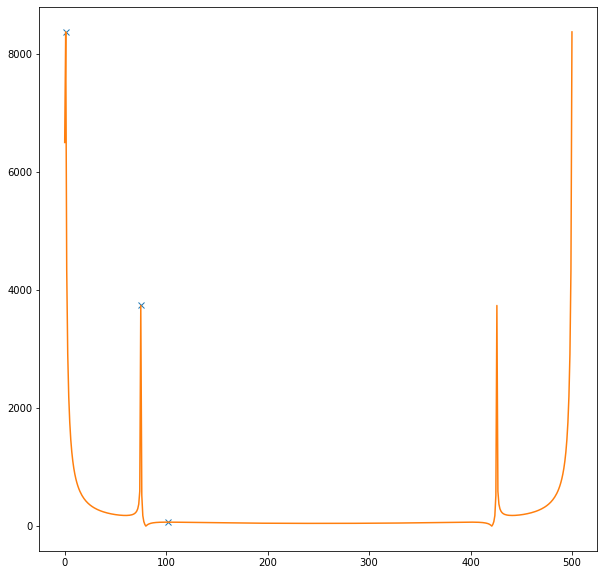

In [73]:
# знаходження суттєвих внесків частот за спостереженнями

T = 5
y = np.fromfile('t18.txt', sep=' ')
n = len(y)
x = np.linspace(0, T, n)

fourier = np.fft.fft(y)

max, _ = scipy.signal.find_peaks(np.abs(fourier)[:len(fourier)//2])

fi = [x/T for x in max if x > 0]

f = fi[1]

print(f"fi = {fi}")
print(f"f = {f}")

plt.figure(figsize=(10, 10))
plt.plot(max, np.abs(fourier[max]), "x")
plt.plot(range(n), np.abs(fourier))
plt.show()

[  0.9999995   -0.99999614   1.99999143 -14.99999619 -14.99999552]


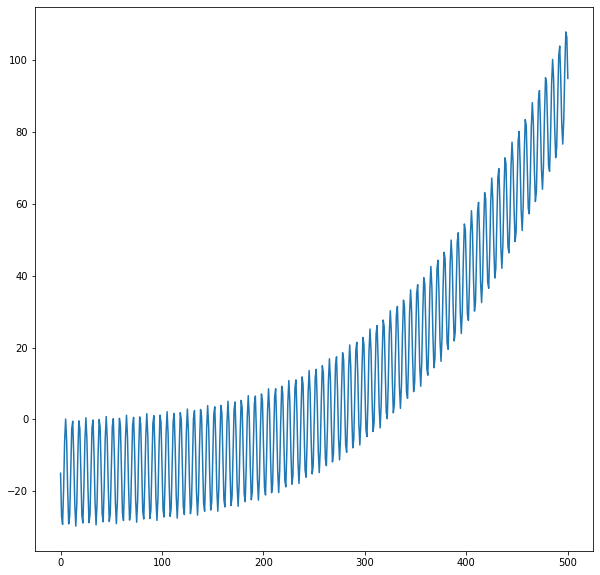

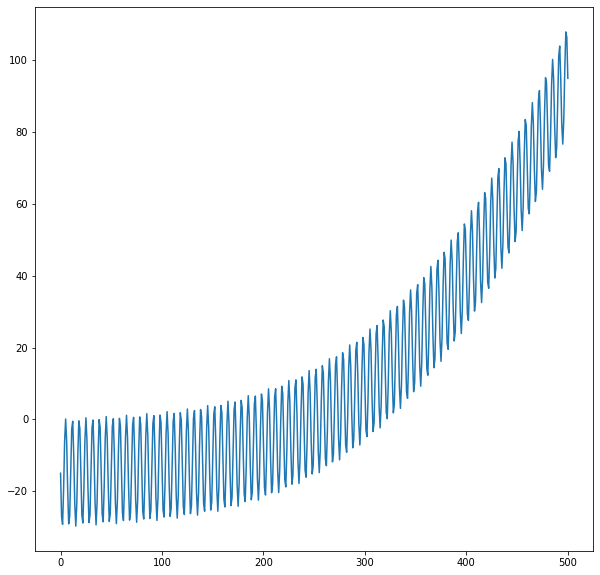

In [74]:
# метод найменших квадратів для пошуку решти коефіцієнтів наближеної функції

A = np.zeros((5, 5))
B = np.zeros(5)

def function(a, x):
    return a[0]*pow(x,3)+a[1]*pow(x,2)+a[2]*x+a[3]*math.sin(2*math.pi*f*x)+a[4]

# calculate 
for k in range(n):
    xk = k * 0.01
    yk = y[k]
    
    for i in range(5):
        B[i] += b(xk,yk,i, f)

        for j in range(i,5):
            A[i][j] += a(xk, i, j, f)
            if i!=j:
                A[j][i] += a(xk, i, j, f)
                
X = np.linalg.inv(A).dot(B)

print(X)

F = [function(X, i * 0.01) for i in range(n)]

#plot experemental data
create_plot(range(n), y)

#plot estimated function
create_plot(range(n), F)